@author: Valentin Larrieu

#  Linear Regresion 

In [1]:
%matplotlib notebook
import math                         
import numpy as np      
from sklearn import linear_model   
import random
import string
import time
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# Linear regression with 2 variables

## Importing the data
We import the database and show the content of it

In [2]:
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['year', 'gnp', 'invest', 'cpi', 'interest']

In [3]:
# We import the dataframe
df = pd.read_csv("https://***//invest.txt", sep=' ',
                 na_values=na_values, usecols=fields) #Data not available now

In [4]:
# We check if the data are correct
print("Size of the dataframe :" , df.shape)
print("\n First Five elements : \n", df.head(5))

null_data = df[df.isnull().any(axis=1)]

print("\n There are " + str(df.isnull().sum().sum()) + ' total missing values')
print("\n There are " + str(null_data.shape[0]) + ' lines with missing values')


Size of the dataframe : (15, 5)

 First Five elements : 
    year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50

 There are 0 total missing values

 There are 0 lines with missing values


## Ploting and transforming the data


<IPython.core.display.Javascript object>


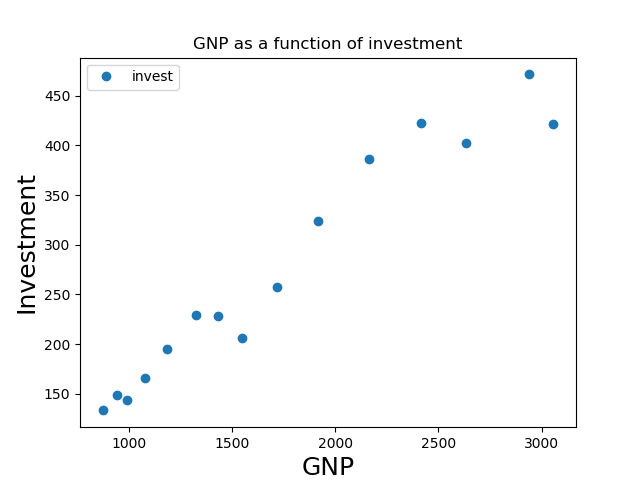

In [5]:
# Plot of GNP and investment
plt.figure()
plt.plot(df['gnp'], df['invest'],"o")
plt.title("GNP as a function of investment")
plt.xlabel('GNP', fontsize=18)
plt.ylabel('Investment', fontsize=18)
plt.legend()
plt.show()

# As we decided to put the new logarithmic value in the original data column, ploting this graph later will plot it
# with the logarithmic values (so if you want to relaunch it after the rescaling, make sure to launch the previous cells)

We logarythmically rescale

In [6]:
# Logarithmic transformation of variables
df['gnp'] = np.log(df.gnp)
df['invest'] = np.log(df.invest)

In [7]:
# Print to see if the values changed
print("\n Table : \n", df.head(15))


 Table : 
     year       gnp    invest     cpi  interest
0   1968  6.772394  4.892602   82.54      5.16
1   1969  6.850126  5.005958   86.79      5.87
2   1970  6.900429  4.971201   91.45      5.95
3   1971  6.982492  5.114395   96.01      4.88
4   1972  7.078257  5.273000  100.00      4.50
5   1973  7.190224  5.437209  105.75      6.44
6   1974  7.268362  5.432411  115.08      7.83
7   1975  7.345494  5.328361  125.79      6.25
8   1976  7.448916  5.552572  132.34      5.50
9   1977  7.559195  5.781052  140.05      5.46
10  1978  7.679667  5.957391  150.42      7.46
11  1979  7.790613  6.047372  163.42     10.28
12  1980  7.875917  5.997198  178.64     11.77
13  1981  7.985382  6.155919  195.51     13.42
14  1982  8.025353  6.044768  207.23     11.02


<IPython.core.display.Javascript object>


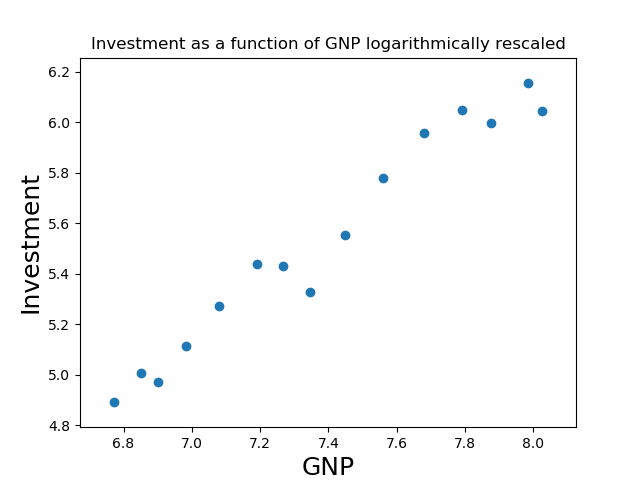

In [8]:
# We visualize our data changed, we rescaled those 2 values
plt.figure()
x = df['gnp']
y = df['invest']
plt.plot(x, y, 'o',label="")
plt.xlabel('GNP', fontsize=18)
plt.ylabel('Investment', fontsize=18)
plt.xlim([df['gnp'].min()-0.1, df['gnp'].max()+0.1]) # we want our graph to have some space with the data
plt.ylim([df['invest'].min()-0.1, df['invest'].max()+0.1])
plt.title("Investment as a function of GNP logarithmically rescaled")
plt.show()

## First manual regression


In [9]:
n = df.shape[0]
p = df.shape[1]

# Creation of variables :
X = df["gnp"]
X_T = X.T
Y = df["invest"]
Y_T = Y.T
one_matrix = np.ones(n)

# We compute the mean of X and Y
X_bar = np.sum(X)/n
Y_bar = np.sum(Y)/n
print("X bar is : ", X_bar)
print("Y bar is : ", Y_bar)

X bar is :  7.383521410468692
Y bar is :  5.532760631125744


In [10]:
# Computation of BO and B1
B1_hat = np.sum((X - X_bar)*(Y - Y_bar))/ np.sum((X - X_bar) * (X - X_bar))
B0_hat = Y_bar - B1_hat*X_bar

print("B0 hat, the intercept  is : ", B0_hat)
print("B1 hat, the sloap is : ", B1_hat)

B0 hat, the intercept  is :  -1.9635913352301815
B1 hat, the sloap is :  1.015281401598871


In [11]:
# Computation of the standart deviation
sigma_hat_squared = (1/(n-2)) * np.sum( (Y - (B0_hat + B1_hat*X) )**2 )
print("Sigma hat squared is : ", sigma_hat_squared)

Sigma hat squared is :  0.0076763385554603995


In [12]:
# Computation of the variances
V_B0_hat = sigma_hat_squared * ( (1/n) + (X_bar**2) /sum ( (X - X_bar)**2 ) )
V_B1_hat = sigma_hat_squared * ( 1 /sum ( (X - X_bar)**2 ) )
std_B0_hat = np.sqrt(V_B0_hat)
std_B1_hat = np.sqrt(V_B1_hat)
print("The standart deviation of B0 hat is : ", std_B0_hat)
print("The standart deviation of B1 hat is : ", std_B1_hat)

The standart deviation of B0 hat is :  0.4095472716623081
The standart deviation of B1 hat is :  0.05538306035485281


In [13]:
def predict_value(value):
    return B0_hat + B1_hat*value

Y_pred = predict_value(X)
R_determination_coef = 1 - ( sum(( Y-Y_pred )**2) /sum(( Y - Y_bar )**2) )
print("Y prediction is: \n", Y_pred)
print("The coefficient R of determination is: ", R_determination_coef)
print("The R squared is: ", R_determination_coef*R_determination_coef)


Y prediction is: 
 0     4.912294
1     4.991214
2     5.042285
3     5.125603
4     5.222832
5     5.336509
6     5.415842
7     5.494152
8     5.599155
9     5.711118
10    5.833432
11    5.946073
12    6.032681
13    6.143819
14    6.184400
Name: gnp, dtype: float64
The coefficient R of determination is:  0.9627572956057855
The R squared is:  0.9269016102421658


The sloap B1 is aproximatly 1.015, has it is different from 0 it is consideres as significativ

In [14]:
# We use the student low to compute the pvalue
t_student = B1_hat / std_B1_hat
p_distrib = stats.t.cdf(t_student , n-2)
p_value = (1 - p_distrib) * 2
print("Test static:", t_student)
print("The P value of the sloap is:", p_value)

# We compute the quantile
t_quantile = stats.t.ppf((1 - (p_value/2)),(n-2))
print("Quantile:", t_quantile)

Test static: 18.331984456866678
The P value of the sloap is: 1.1363709973011282e-10
Quantile: 18.331985146031123


## Confidence interval

In [15]:
# Data given
GNP = 1000
alpha01 = 0.1

In [16]:
# Prediction
pred_gnp_1000 = np.exp(B0_hat + B1_hat * np.log(GNP) )
print("Y predicted with GNP = 1000 is: ", pred_gnp_1000)
print("Y predicted with GNP = 1000 in logarithm is: ", np.log(pred_gnp_1000))

Y predicted with GNP = 1000 is:  155.97942793105494
Y predicted with GNP = 1000 in logarithm is:  5.049724126316802


In [17]:
# We compute the quantile
quantile_01 = stats.t.ppf((1 - (alpha01/2)),(n-2))

# We create the new X ans scale it
X_new = np.array(1000)
X_new_log = np.log(X_new)

print("Quantile for alpha = 0.1 :", quantile_01)

Quantile for alpha = 0.1 : 1.7709333959867988


In [18]:
# We put the coefficient of the model together
B = [B0_hat,B1_hat]

X_new = np.array([1,np.log(1000)]).T
Y_new = np.dot(X_new.T, B)

X1 = np.transpose(np.array([np.ones(n),df['gnp']]))

# We compute the Gram matrix
G = np.matmul(X1.T,X1)
G_inv = np.linalg.inv(G)

# WE compute the two interval
conf_inf = Y_new - quantile_01*np.sqrt(X_new.T.dot(G_inv).dot(X_new))*np.sqrt(sigma_hat_squared)
conf_sup = Y_new + quantile_01*np.sqrt(X_new.T.dot(G_inv).dot(X_new))*np.sqrt(sigma_hat_squared)

pred_inf = Y_new - quantile_01*np.sqrt(1 + X_new.T.dot(G_inv).dot(X_new))*np.sqrt(sigma_hat_squared)
pred_sup = Y_new + quantile_01*np.sqrt(1 + X_new.T.dot(G_inv).dot(X_new))*np.sqrt(sigma_hat_squared)

conf = [conf_inf,conf_sup]
pred = [pred_inf,pred_sup]

print("Confidence interval for alpha = 0.01 :", conf)
print("Confidence interval for alpha in real value = 0.01 :", np.exp(conf))
print("Prediction interval for alpha = 0.01 :", pred)
print("Prediction interval for alpha in real value = 0.01 :", np.exp(pred))

Confidence interval for alpha = 0.01 : [4.988222845971112, 5.111225406662491]
Confidence interval for alpha in real value = 0.01 : [146.67552673 165.87349287]
Prediction interval for alpha = 0.01 : [4.882820023438682, 5.216628229194922]
Prediction interval for alpha in real value = 0.01 : [132.00238933 184.31167845]


In [19]:
# We compute the interval for alpha = 0.1
tstud01 = stats.t.ppf(1.0 - alpha01/2, n-2)

# We create function to compute the interval
def compute_conf_interval2(x_arg,quantile,model_coef,G,sigma):
    Y_comp = np.dot(x_arg.T, model_coef)
    IC_conf_cp = quantile * np.sqrt(x_arg.T.dot(np.linalg.inv(G)).dot(x_arg))*np.sqrt(sigma)
    IC_conf_list = [Y_comp - IC_conf_cp, Y_comp + IC_conf_cp]
    return IC_conf_list

def compute_pred_interval2(x_arg,quantile,model_coef,G,sigma):
    Y_comp = np.dot(x_arg.T, model_coef)
    IC_pred_cp = quantile * np.sqrt(1 + x_arg.T.dot(np.linalg.inv(G)).dot(x_arg))*np.sqrt(sigma)
    IC_pred_list = [Y_comp - IC_pred_cp, Y_comp + IC_pred_cp]
    return IC_pred_list

## Ploting the interval


In [20]:
# We compute the value we will need for our graph, to plot a line we need 2 points
X_print = np.transpose(np.array([np.ones(n),df['gnp']]))
pred_int_low = [ compute_pred_interval2(x,tstud01,B,G,sigma_hat_squared)[0] for x in X_print ]
pred_int_high = [ compute_pred_interval2(x,tstud01,B,G,sigma_hat_squared)[1] for x in X_print ]
conf_int_low = [ compute_conf_interval2(x,tstud01,B,G,sigma_hat_squared)[0] for x in X_print ]
conf_int_high = [ compute_conf_interval2(x,tstud01,B,G,sigma_hat_squared)[1] for x in X_print ]


<IPython.core.display.Javascript object>


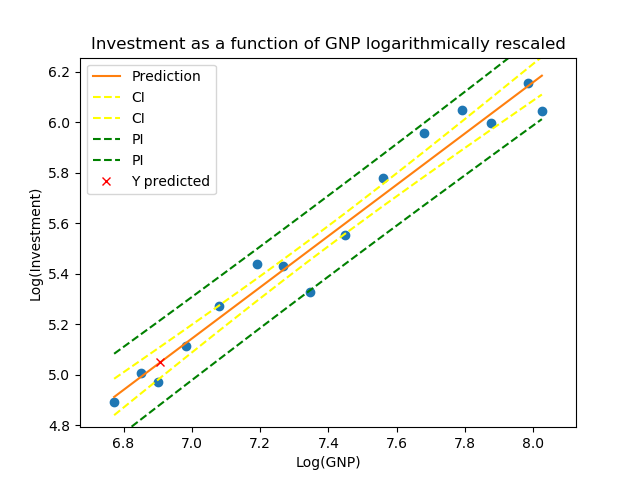

In [21]:
# We visualize our data changed, we rescaled those 2 values
plt.figure()
# We set our variables to print
x = df['gnp']
y = df['invest']
y_vals = B0_hat + B1_hat * x
    
plt.plot(x, y, 'o',label="")
plt.plot(x, y_vals, '-', label='Prediction')
plt.plot(X, conf_int_low, '--', color='yellow', label='CI')
plt.plot(X, conf_int_high, '--', color='yellow', label='CI')
plt.plot(X, pred_int_low, '--', color='green', label='PI')
plt.plot(X, pred_int_high, '--', color='green', label='PI')
plt.plot(np.log(1000),np.log(pred_gnp_1000),'x',label="Y predicted",color="red")
plt.legend()

# We label
plt.xlabel('Log(GNP)', fontsize=10)
plt.ylabel('Log(Investment)', fontsize=10)

# We reduce the space arround our points
plt.xlim([df['gnp'].min()-0.1, df['gnp'].max()+0.1]) # we want our graph to have some space with the data
plt.ylim([df['invest'].min()-0.1, df['invest'].max()+0.1])
plt.title("Investment as a function of GNP logarithmically rescaled")
plt.show()


we can see that CI and PI are really close. Our interval seems pretty accurate

## Comparing with sklearn implementation


In [22]:
# We create our scikit learn model
skl_lm = linear_model.LinearRegression(fit_intercept=True)
skl_lm.fit(pd.DataFrame(X), pd.DataFrame(Y))
y_pred_scikit = skl_lm.predict(np.log(GNP))

# We get the values we want to compare
B0_lm = skl_lm.intercept_[0] 
B1_lm = skl_lm.coef_[0][0]

#We print the results
print("Y predicted with sklear", y_pred_scikit[0][0],"vs Y predicted before ",np.log(pred_gnp_1000))
print("Difference between them  : ", np.log(pred_gnp_1000) - y_pred_scikit[0][0], " => They are identical")
print("Values of B0 : ", B0_lm," Value of B1 : ", B1_lm)
print("Values previously estimated manually : B0 hat = ", B0_hat, " B1 hat = ",B1_hat)
print("Difference between B0  : ", B0_hat - B0_lm, " => They are really close")
print("Difference between B1  : ", B1_hat - B1_lm, " => They are really close")

print("Score of our scikit learn model", skl_lm.score(pd.DataFrame(X), pd.DataFrame(Y)), \
      "It's close to one so it is a good model") 

Y predicted with sklear 5.049724126316802 vs Y predicted before  5.049724126316802
Difference between them  :  0.0  => They are identical
Values of B0 :  -1.9635913352301833  Value of B1 :  1.0152814015988711
Values previously estimated manually : B0 hat =  -1.9635913352301815  B1 hat =  1.015281401598871
Difference between B0  :  1.7763568394002505e-15  => They are really close
Difference between B1  :  -2.220446049250313e-16  => They are really close
Score of our scikit learn model 0.9627572956057855 It's close to one so it is a good model


## Plot of the model


<IPython.core.display.Javascript object>


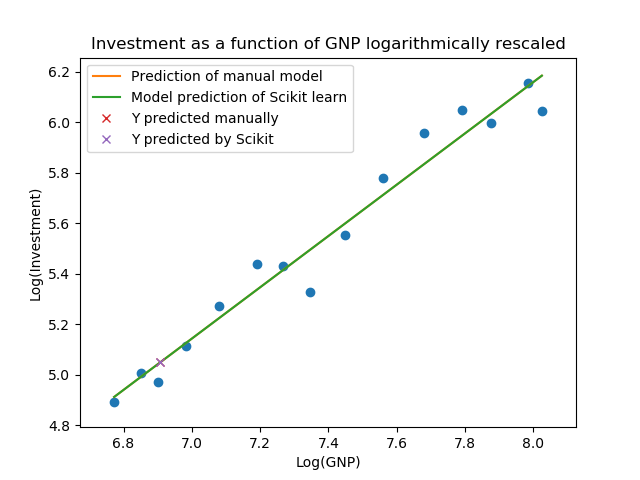

In [23]:
# We visualize our data changed, we rescaled those 2 values
plt.figure()
# We set our variables to print
x = df['gnp']
y = df['invest']

# We plot our values
plt.plot(x, y, 'o',label="")
plt.plot(x, y_vals, '-', label='Prediction of manual model')
plt.plot(x, skl_lm.predict(pd.DataFrame(x)), '-', label='Model prediction of Scikit learn')
plt.plot(np.log(1000),np.log(pred_gnp_1000),'x',label="Y predicted manually")
plt.plot(np.log(1000),y_pred_scikit,'x',label="Y predicted by Scikit")

plt.legend()

# We label
plt.xlabel('Log(GNP)', fontsize=10)
plt.ylabel('Log(Investment)', fontsize=10)

# We reduce the space arround our points
plt.xlim([df['gnp'].min()-0.1, df['gnp'].max()+0.1]) # we want our graph to have some space with the data
plt.ylim([df['invest'].min()-0.1, df['invest'].max()+0.1])
plt.title("Investment as a function of GNP logarithmically rescaled")
plt.show()


As we can see the two lines are almost identical, so are the predicted values

# Linear regression with 3 variables

## Gram matrix


In [24]:
# We create the new X
X2 = np.transpose(np.array([np.ones(n),df['gnp'],df['interest']]))

In [25]:
# WE compute the Gram matrix
G2 = np.matmul(X2.T,X2)
print("Gram of X2 is: \n", G2)

G2_inv = np.linalg.inv(G2)

Gram of X2 is: 
 [[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]


In [26]:
print("The rank of the matrix is",np.linalg.matrix_rank(G2))

The rank of the matrix is 3


The matrix is of rank 3, it is full rank, we will be able to invert it

## Standart deviation and pvalue


In [27]:
# We compute the mean of X
X2_bar = np.sum(X2)/n
print("X bar is : \n", X2_bar)

X bar is : 
 15.836188077135363


In [28]:
# Computation of BO, B1 and B2
B_hat2_vec = np.dot(G2_inv,np.dot(X2.T,Y))

print("B0 hat, the intercept  is : ", B_hat2_vec[0])
print("B1 hat, is : ", B_hat2_vec[1])
print("B2 hat, is : ", B_hat2_vec[2])

B0 hat, the intercept  is :  -2.1804547259089304
B1 hat, is :  1.0512426913193167
B2 hat, is :  -0.0065288794060478494


In [29]:
# we compute y hat
Y_hat2 = np.dot(X2,B_hat2_vec)

# We compute sigma
sigma_hat_squared2 = 1/(n-3)*np.linalg.norm(Y-Y_hat2)**2
print("Sigma hat squared is : ", sigma_hat_squared2)

# We compute the var
var_B_hat2  = [sigma_hat_squared2*G2_inv[i,i] for i in range(3)]
print("VB0 hat, the intercept  is : ", var_B_hat2[0])
print("VB1 hat, is : ", var_B_hat2[1])
print("VB2 hat, is : ", var_B_hat2[2])

Sigma hat squared is :  0.008192432955519798
VB0 hat, the intercept  is :  0.4387726972410064
VB1 hat, is :  0.010416524891892456
VB2 hat, is :  0.00023544462909522054


In [30]:
# We compute the variances
var_B_hat2  = [sigma_hat_squared2*G2_inv[i,i] for i in range(3)]
print("VB0 hat, the intercept  is : ", var_B_hat2[0])
print("VB1 hat, is : ", var_B_hat2[1])
print("VB2 hat, is : ", var_B_hat2[2])

# We compute the standard deviation
std_B_hat2 = [np.sqrt(v) for v in var_B_hat2]

print("The standart deviation of B0 hat is : ", std_B_hat2[0])
print("The standart deviation of B1 hat is : ", std_B_hat2[1])
print("The standart deviation of B2 hat is : ", std_B_hat2[2])

VB0 hat, the intercept  is :  0.4387726972410064
VB1 hat, is :  0.010416524891892456
VB2 hat, is :  0.00023544462909522054
The standart deviation of B0 hat is :  0.6623991977961676
The standart deviation of B1 hat is :  0.10206137806189203
The standart deviation of B2 hat is :  0.015344205065601168


In [31]:
# We compute the t stat :
t_student2 = B_hat2_vec/std_B_hat2
print("The tstat of B0 hat is : ", t_student2[0])
print("The tstat of B1 hat is : ", t_student2[1])
print("The tstat of B2 hat is : ", t_student2[2])

p_distrib2 = stats.t.cdf(t_student2 , n-3)
p_value2 = (1 - p_distrib2) * 2
print("The P value of B0 is:", p_value2[0])
print("The P value of B1 is:", p_value2[1])
print("The P value of B2 is:", p_value2[2])

The tstat of B0 hat is :  -3.291753270782034
The tstat of B1 hat is :  10.3001028526366
The tstat of B2 hat is :  -0.42549479612237284
The P value of B0 is: 1.9935616329490324
The P value of B1 is: 2.5995168484449493e-07
The P value of B2 is: 1.3219928581152474


## Confidence Interval

In [32]:
alpha001 = 0.001
gnp = 1000
interest = 10

In [33]:
# We create the new X and scale it
X2_new = np.array([1,np.log(1000),10]).T

Y2_new = np.dot(X2_new.T, B_hat2_vec)
Y2_new_real = np.exp(Y2_new) 
print("Y predicted with GNP = 1000 and interest = 10 is in logarithm: ", Y2_new)
print("Y predicted with GNP = 1000 and interest = 10 is without rescaling: ", Y2_new_real)


Y predicted with GNP = 1000 and interest = 10 is in logarithm:  5.01598373048299
Y predicted with GNP = 1000 and interest = 10 is without rescaling:  150.8044147209174


In [34]:
# We compute the quantile
quantile_001 = stats.t.ppf((1 - (alpha001/2)),(n-3))
print("Quantile for alpha = 0.001 :", quantile_001)

# WE compute the two interval
conf_inf2 = Y2_new - quantile_001*np.sqrt(X2_new.T.dot(G2_inv).dot(X2_new))*np.sqrt(sigma_hat_squared2)
conf_sup2 = Y2_new + quantile_001*np.sqrt(X2_new.T.dot(G2_inv).dot(X2_new))*np.sqrt(sigma_hat_squared2)

pred_inf2 = Y2_new - quantile_001*np.sqrt(1 + X2_new.T.dot(G2_inv).dot(X2_new))*np.sqrt(sigma_hat_squared2)
pred_sup2 = Y2_new + quantile_001*np.sqrt(1 + X2_new.T.dot(G2_inv).dot(X2_new))*np.sqrt(sigma_hat_squared2)

conf2 = [conf_inf2,conf_sup2]
pred2 = [pred_inf2,pred_sup2]

print("Confidence interval for alpha = 0.001 :", conf2)
print("Prediction interval for alpha = 0.001 :", pred2)


Quantile for alpha = 0.001 : 4.317791283606267
Confidence interval for alpha = 0.001 : [4.640184036688485, 5.391783424277495]
Prediction interval for alpha = 0.001 : [4.473803343640639, 5.558164117325341]


## Ploting the results


<IPython.core.display.Javascript object>


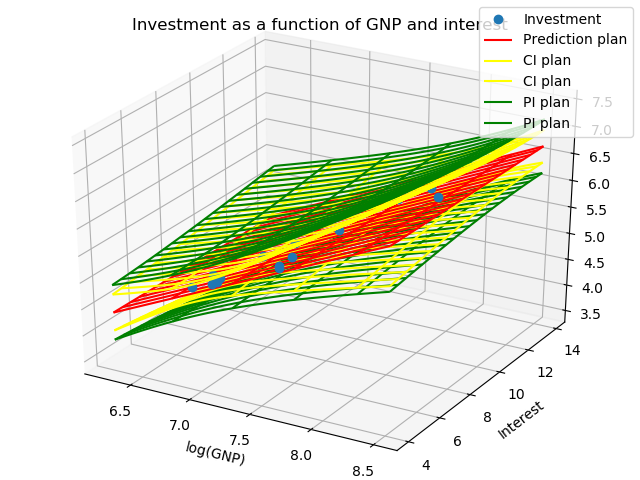

In [35]:
# visualisation of the scikit learn model
fig = plt.figure()
ax = Axes3D(fig)

# We prepare our data
XX = np.arange(df['gnp'].min()-0.5, df['gnp'].max()+0.5, 0.05)
YY = np.arange(df['interest'].min()-0.5, df['interest'].max()+0.5, 0.05)
xx, yy = np.meshgrid(XX, YY)
zz = B_hat2_vec[0] + B_hat2_vec[1]*xx + B_hat2_vec[2]*yy

# We compute the plans for PI and CI
ZZ_IC_inf = [[compute_conf_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[0] \
              for x1_ in XX] for x2_ in YY]
ZZ_IC_sup = [[compute_conf_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[1] \
              for x1_ in XX] for x2_ in YY]
ZZ_PI_inf = [[compute_pred_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[0] \
              for x1_ in XX] for x2_ in YY]
ZZ_PI_sup = [[compute_pred_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[1] \
              for x1_ in XX] for x2_ in YY]
# We plot our plan
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, color="red", label="Prediction plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_IC_inf), rstride=10, cstride=10, color="yellow", label="CI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_IC_sup), rstride=10, cstride=10, color="yellow", label="CI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_PI_inf), rstride=10, cstride=10, color="green", label="PI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_PI_sup), rstride=10, cstride=10, color="green", label="PI plan")

ax.plot(df['gnp'],df['interest'],Y,'o', label='Investment')

# We name our axes
plt.title("Investment as a function of GNP and interest")
plt.xlabel('log(GNP)', fontsize=10)
plt.ylabel('Interest', fontsize=10)

plt.legend()
plt.show()

## Comparing with sklearn model

In [36]:
# We create our scikit learn model
skl_lm2 = linear_model.LinearRegression(fit_intercept=True)
skl_lm2.fit(X2, pd.DataFrame(Y))
y_pred_scikit2 = skl_lm2.predict([X2_new])

# We get the values we want to compare
B0_lm2 = skl_lm2.intercept_[0] 
B1_lm2 = skl_lm2.coef_[0][1]
B2_lm2 = skl_lm2.coef_[0][0]

# We print the results
print("Y predicted with sklearn", y_pred_scikit2[0][0])

print("Values of B0 : ", B0_lm2," Value of B1 : ", B1_lm2," Value of B2 : ", B2_lm2)
print("Score of our scikit learn model", skl_lm2.score(X2, pd.DataFrame(Y)), "It's close to one so it is a good model") 

Y predicted with sklearn 5.0159837304826835
Values of B0 :  -2.180454725911404  Value of B1 :  1.05124269131966  Value of B2 :  0.0
Score of our scikit learn model 0.9633108306726242 It's close to one so it is a good model


In [37]:
# Comparison of the 2 models :
print("Y predicted with sklear", y_pred_scikit2[0][0],"vs Y predicted before ",Y2_new)
print("Difference between them  : ", Y2_new - y_pred_scikit2[0][0], " => They are close")

print("Values of B0 : ", B0_lm2," Value of B1 : ", B1_lm2," Value of B2 : ", B2_lm2)
print("Values previously estimated manually : B0 hat = ", B_hat2_vec[0], " B1 hat = ",B_hat2_vec[1], \
      " B2 hat = ",B_hat2_vec[2])
print("Difference between B0  : ", B_hat2_vec[0] - B0_lm2, " => They really close")
print("Difference between B1  : ", B_hat2_vec[1] - B1_lm2, " => They really close")
print("Difference between B2  : ", B_hat2_vec[2] - B2_lm2, " => They really close")


Y predicted with sklear 5.0159837304826835 vs Y predicted before  5.01598373048299
Difference between them  :  3.064215547965432e-13  => They are close
Values of B0 :  -2.180454725911404  Value of B1 :  1.05124269131966  Value of B2 :  0.0
Values previously estimated manually : B0 hat =  -2.1804547259089304  B1 hat =  1.0512426913193167  B2 hat =  -0.0065288794060478494
Difference between B0  :  2.4735768988648488e-12  => They really close
Difference between B1  :  -3.432809592140984e-13  => They really close
Difference between B2  :  -0.0065288794060478494  => They really close


As we can see our 2 models are still close, but here the scikit model is a little bit far away from our manual model. 
The library seem to be more effective

<IPython.core.display.Javascript object>


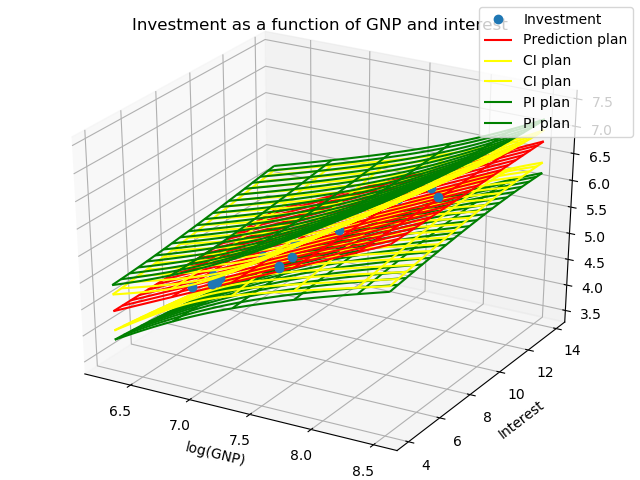

In [38]:
# visualisation of the scikit learn model
fig = plt.figure()
ax = Axes3D(fig)

# We prepare our data
XX = np.arange(df['gnp'].min()-0.5, df['gnp'].max()+0.5, 0.05)
YY = np.arange(df['interest'].min()-0.5, df['interest'].max()+0.5, 0.05)
xx, yy = np.meshgrid(XX, YY)
zz = B0_lm2 + B1_lm2*xx + B2_lm2*yy

# We compute the plans for PI and CI
ZZ_IC_inf = [[compute_conf_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[0] \
              for x1_ in XX] for x2_ in YY]
ZZ_IC_sup = [[compute_conf_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[1] \
              for x1_ in XX] for x2_ in YY]
ZZ_PI_inf = [[compute_pred_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[0] \
              for x1_ in XX] for x2_ in YY]
ZZ_PI_sup = [[compute_pred_interval2(np.array([1,x1_,x2_]), quantile_001,B_hat2_vec,G2,sigma_hat_squared2)[1] \
              for x1_ in XX] for x2_ in YY]

# We plot our plan
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, color="red", label="Prediction plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_IC_inf), rstride=10, cstride=10, color="yellow", label="CI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_IC_sup), rstride=10, cstride=10, color="yellow", label="CI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_PI_inf), rstride=10, cstride=10, color="green", label="PI plan")
ax.plot_wireframe(xx, yy, np.array(ZZ_PI_sup), rstride=10, cstride=10, color="green", label="PI plan")

ax.plot(df['gnp'],df['interest'],Y,'o', label='Investment')

# We name our axes
plt.title("Investment as a function of GNP and interest")
plt.xlabel('log(GNP)', fontsize=10)
plt.ylabel('Interest', fontsize=10)

plt.legend()
plt.show()

As we can see the new plan is really close to the manually calculated one (we can print them here but they would be almost superposed)